# Data Cleaning: 
1. Missing Data
2. Irregular Data (Outliers)
3. Data Trransformation
4. Scaling


# Missing Data

lets install datawig for the deep learnng preprocessing 

In [8]:
pip install datawig

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv')

In [2]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)
print()
print('Numeric columns:')
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)
print()
print('Non-numeric columns:')
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

print()
print()
def non_numeric(df):
    '''
    checking null values
    '''
    df_numeric = df.select_dtypes(include=[np.number])
    
    if df_numeric.isnull().sum().sum() > 0:
        total_numeric = df_numeric.isnull().sum().sort_values(ascending=False) 
        total = total_numeric[total_numeric > 0]

        percent = df_numeric.isnull().mean().sort_values(ascending=False) 
        percent_ready = percent[percent > 0] 

        missing_data_numeric = pd.concat([total, percent_ready], axis=1, keys=['Total', 'Percent_ready'])
    
        print(missing_data_numeric)
    else: 
        print('No Missing values found in numeric.')
        
def numeric(df):
    '''
    checking null values
    '''
    df_non_numeric = df.select_dtypes(exclude=[np.number])
    
    if df_non_numeric.isnull().sum().sum() > 0:
        total_non_numeric = df_non_numeric.isnull().sum().sort_values(ascending=False) 
        total = total_non_numeric[total_non_numeric > 0]

        percent = df_non_numeric.isnull().mean().sort_values(ascending=False) 
        percent_ready = percent[percent > 0] 

        missing_data_non_numeric = pd.concat([total, percent_ready], axis=1, keys=['Total', 'Percent_ready'])
    
        print(missing_data_non_numeric)
    else: 
        print('No Missing values found in numeric.')

print('Total and Percentage of Missing values in numeric:\n')
non_numeric(df)
print()
print()
print()
print('Total and Percentage of Missing values in non numeric:\n')
numeric(df)

(891, 12)
PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Numeric columns:
['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']

Non-numeric columns:
['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


Total and Percentage of Missing values in numeric:

        Total  Percent_ready
Age       177       0.198653
Fare      109       0.122334
Pclass     74       0.083053
Parch      45       0.050505



Total and Percentage of Missing values in non numeric:

          Total  Percent_ready
Cabin       687       0.771044
Embarked    145       0.162738
Ticket      124       0.139169
Sex         115       0.129068


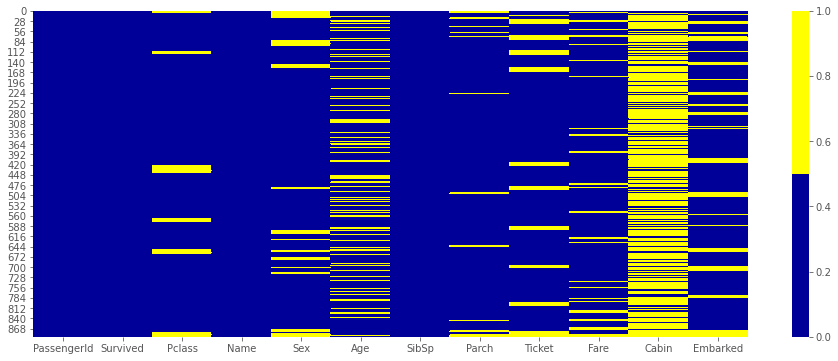

In [3]:
cols = df.columns # first 30 columns
plt.figure(figsize=(16, 6))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered

In [4]:
for column in df.columns:
    if df[column].isnull().sum()/df.shape[0] > 0.70:
        df.drop(columns=[column], axis = 1, inplace = True)

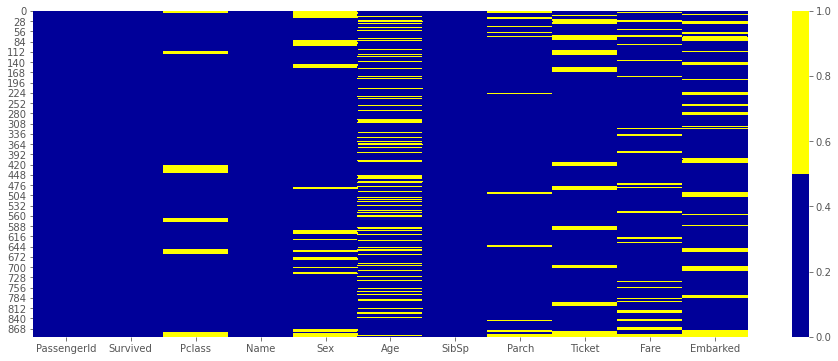

In [5]:
cols = df.columns # first 30 columns
plt.figure(figsize=(16, 6))
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# The Missing Data Classification

1. Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

2. Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. Whether an observation is missing has nothing to do with the missing values, but it does have to do with the values of an individual’s observed variables. So, for example, if men are more likely to tell you their weight than women, weight is MAR.

3. Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study. MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. You have to include some model for why the data are missing and what the likely values are.

“Missing Completely at Random” and “Missing at Random” are both considered ‘ignorable’ because we don’t have to include any information about the missing data itself when we deal with the missing data.
https://www.theanalysisfactor.com/missing-data-mechanism/





# Missing data imputations


Questions to be answered:
Do missing data is valuable?

1. Drop rows and/or columns with missing data. If the missing data is not valuable, just drop the rows (i.e. specific customers, sensor reading, or other individual exemplars) from your analysis. If entire columns are filled with missing data, drop them as well. There is no need to analyze the column “Quantity of NewAwesomeProduct Bought” if no one has bought it yet.
2. Recode missing data into a different format. Numerical computations can break down with missing data. Recoding missing values into a different column saves the day. For example, the column “payment_date” with empty rows can be recoded into a column “payed_yet” with 0 for “no” and 1 for “yes”. (https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

3. Handling categorical features
4. Handling numerical features

# Handling missing categorical features

In [6]:
#1. Handling categorical features_most frequent value

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

lst = []
missing_columns = []
for column in df_non_numeric.columns:
    if df_non_numeric[column].isnull().sum() > 0:
        missing_columns.append(column)
        
df_non_numeric = df.select_dtypes(exclude=[np.number])

df_non_numeric = df.select_dtypes(exclude=[np.number])
#df_non_numeric.drop('Name', axis = 1, inplace = True)
for column in missing_columns:
    most_freq_feature = df_non_numeric[column].value_counts(ascending = False).index[0]
    lst.append(most_freq_feature)
features = missing_columns

df1 = pd.DataFrame(lst,features, columns = ['Max_Count'])

def impute_nan(df):
    for column in missing_columns:
        most_frequent_category = df[column].value_counts().index[0]
        df[column].fillna(most_frequent_category, inplace=True)
    return df

df_most_freq = impute_nan(df_non_numeric)

# Advantages:
# Easy to implement

# Disadvantages:
# Distortion of the most frequent variable




#2. Adding a Variable To Capture NAN

# Create a new column and replace 1 if the category is NAN else 0. 
# Replace NAN value with most occurred category in the actual column.

# Function to impute most occured category and add importance vairable
def impute_nan_add_vairable(df_non_numeric):
    
    df_new_cat_variable = df_non_numeric.copy()
    for column in df_new_cat_variable.columns:
    
        # add new column and replace if category is null then 1 else 0
        df_new_cat_variable[column + 'newvar_cat'] = np.where(df_new_cat_variable[column].isnull(),1,0)
    
        # Take most occured category in that vairable (.mode())
        Mode_Category = df_new_cat_variable[column].mode()[0]
    
        # Replace NAN values with most occured category in actual vairable
        df_new_cat_variable[column].fillna(Mode_Category,inplace=True)
        
    return df_new_cat_variable

# Advantages: 
# Capture the importance of missingness.

# Disadvantages: 
# Creating Additional Features(Curse of Dimensionality)



#3. Handling categorical features_replacing NAN with new category
df_new_cat = df_non_numeric.copy()
for column in df_new_cat.columns:
    df_new_cat[column + 'newvar'] = np.where(df_new_cat[column].isnull(), 'Missing', df_new_cat[column])

# Advantages:
# easy to implement, preserves the variance.

# Disadvantages:
# result in random data if the missing category a lot. Do not use  when missing data is a high percentage of the data.



#4. Target Guided Ordinal Encoding
df = pd.read_csv(r"C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv", usecols=['Cabin','Survived'])
df['Cabin'].fillna('Missing', inplace = True)
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.Cabin.unique()
df.groupby(['Cabin'])['Survived'].mean()
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels2 = {k:v for v,k in enumerate(ordinal_labels)}
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)


#5. Mean Encoding
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)



#6. Count Or Frequency Encoding
cabin_map=df['Cabin'].value_counts().to_dict()
cabin_map

df['Cabin_ok']=df['Cabin'].map(cabin_map)


# Label encoder
from sklearn.preprocessing import LabelEncoder
df['Cabin'].fillna('U0', inplace=True)
df['CabinSection'] = LabelEncoder().fit_transform(df['Cabin'].map(lambda x: x[0]))


# Handling missing numerical features

In [7]:
df = pd.read_csv(r"C:\Users\valer\OneDrive\Desktop\Python\train.csv", usecols=['Age','Pclass', 'SibSp', 'Sex', 'Survived'])
df.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [8]:

#dropping columns
def drop_nan(df, variable):
    df[variable+'_dropped'] = df[variable].dropna()
    return df


# mean imputation
def impute_nan_mean(df, variable):
    mean = df.Age.mean()
    df[variable+'_median'] = df[variable].fillna(mean)
    return df


# mode imputation
def impute_nan_mode(df, variable):
    mode = df.Age.mode()
    df[variable+'_median'] = df[variable].fillna(mode)
    return df



# median imputation
def impute_nan_median(df, variable):
    median = df.Age.median()
    df[variable+'_median'] = df[variable].fillna(median)
    return df

# Random sample imputation peaks random data to replace the nan values applied for MCAR
def impute_nan_random(df,variable):
    median = df.Age.median()
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    variable = df['Age']
    return df

# KNN imputation
def impute_KNN(df):
    from sklearn.impute import KNNImputer
    knn_imputer = KNNImputer(n_neighbors=3)
    inputt = df['Age'].values.reshape(-1,1)
    knn_imputer.fit(inputt)
    knn_imputer.transform(inputt)
    df['Age_KNN'] = inputt 
    return df

# group by Sex and Class
def impute_by_Sex_and_Pclass(df):
    grouped = df.groupby(['Sex','Pclass'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    # apply the grouped median value on the Age NaN
    df['Age_Sex_Pclass'] = grouped.Age.apply(lambda x: x.fillna(x.median()))
    #df7['Age_median_alternative'] = df7['Age'].fillna(df7.groupby('Pclass')['Age'].transform('median'))
    return df

# group by Sex and Class
def impute_by_Pclass(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    return Age

# regression_imputer
def Regression_Age(df):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    reg_imputer = IterativeImputer(max_iter=10, random_state=123)
    vals = df['Age'].values.reshape(-1,1)
    reg_imputer.fit(vals)
    df['Age_regression'] = reg_imputer.transform(vals)
    return df


# group by Age and Survived
def impute_by_Age_and_Survived(df):
    grouped = df.groupby(['Age','Survived'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    df['Age_Survived'] = df['Age'].fillna(df.groupby('Survived')['Age'].transform('median'))
    return df

# group by Age and Sex
def impute_by_Age_and_Sex(df):
    grouped = df.groupby(['Age','Survived'])  
    # view the median Age by the grouped features 
    grouped.Age.median()
    df['Age_Sex'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
    return df

def impute_Age_by_extreme_Age_values(df):
    extreme = df.Age.mean() + 3*df.Age.std()
    df['Age_extreme'] = df['Age'].fillna(extreme)
    return df

def impute_Age_Datawig(df):
    import datawig

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=['Pclass','SibSp'], # column(s) containing information about the column we want to impute
        output_column= 'Age', # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
    )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df, num_epochs=5)

    #Impute missing values and return original dataframe with predictions
    df = imputer.predict(df)
    
    return df

In [9]:


drop_nan(df, 'Age')
impute_nan_median(df, 'Age')
impute_nan_random(df,'Age')
impute_KNN(df)
impute_by_Sex_and_Pclass(df)
df['Age_Pclass']=df[['Age','Pclass']].apply(impute_by_Pclass,axis=1)
Regression_Age(df)
impute_by_Age_and_Sex(df)
impute_by_Age_and_Survived(df)
impute_Age_by_extreme_Age_values(df)
df = impute_Age_Datawig(df)

2021-03-31 09:15:03,939 [INFO]  
========== start: fit model
2021-03-31 09:15:03,940 [WARNING]  Already bound, ignoring bind()
2021-03-31 09:15:04,017 [INFO]  Epoch[0] Batch [0-26]	Speed: 8021.69 samples/sec	cross-entropy=16.981494	Age-accuracy=0.000000
2021-03-31 09:15:04,068 [INFO]  Epoch[0] Train-cross-entropy=15.843605
2021-03-31 09:15:04,069 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-03-31 09:15:04,071 [INFO]  Epoch[0] Time cost=0.125
2021-03-31 09:15:04,078 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2021-03-31 09:15:04,085 [INFO]  Epoch[0] Validation-cross-entropy=17.584345
2021-03-31 09:15:04,087 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-03-31 09:15:04,148 [INFO]  Epoch[1] Batch [0-26]	Speed: 7252.27 samples/sec	cross-entropy=16.411858	Age-accuracy=0.000000
2021-03-31 09:15:04,196 [INFO]  Epoch[1] Train-cross-entropy=15.234140
2021-03-31 09:15:04,198 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-03-31 09:15:04,199 [INFO]  Epoch[1] Time 

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Age_dropped,Age_median,Age_random,Age_KNN,Age_Sex_Pclass,Age_Pclass,Age_regression,Age_Sex,Age_Survived,Age_extreme,Age_imputed
0,0,3,male,22.0,1,22.0,22.0,22.0,22.0,22.0,22.0,22.000000,22.0,22.0,22.00000,25.769751
1,1,1,female,38.0,1,38.0,38.0,38.0,38.0,38.0,38.0,38.000000,38.0,38.0,38.00000,40.879403
2,1,3,female,26.0,0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.0,26.00000,28.829061
3,1,1,female,35.0,1,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.00000,40.879403
4,0,3,male,35.0,0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.0,35.0,35.00000,28.829061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,27.0,27.0,27.0,27.0,27.0,27.0,27.000000,27.0,27.0,27.00000,32.321560
887,1,1,female,19.0,0,19.0,19.0,19.0,19.0,19.0,19.0,19.000000,19.0,19.0,19.00000,41.077933
888,0,3,female,NaN,1,NaN,28.0,15.0,NaN,21.5,24.0,29.699118,27.0,28.0,73.27861,25.769751
889,1,1,male,26.0,0,26.0,26.0,26.0,26.0,26.0,26.0,26.000000,26.0,26.0,26.00000,41.077933


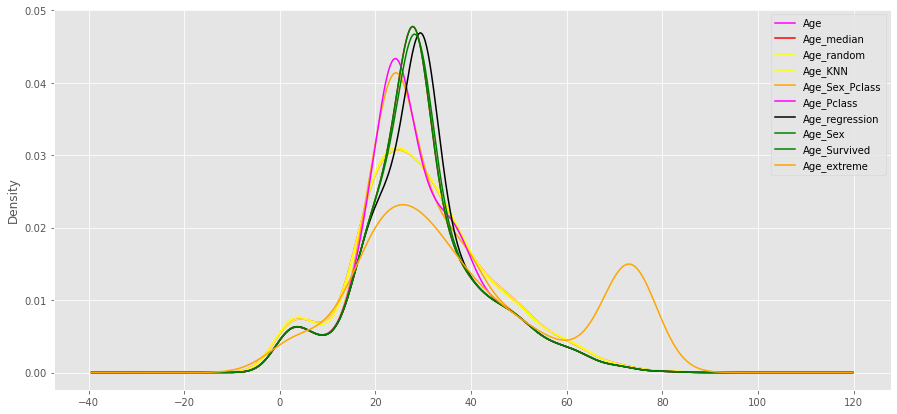

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color = 'magenta')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='yellow')
df['Age_KNN'].plot(kind='kde', ax=ax, color='yellow')
df['Age_Sex_Pclass'].plot(kind='kde', ax=ax, color='orange')
df.Age_Pclass.plot(kind='kde', ax=ax, color='magenta')

df.Age_regression.plot(kind='kde', ax=ax, color='black')
df.Age_Sex.plot(kind='kde', ax=ax, color='green')
df.Age_Survived.plot(kind='kde', ax=ax, color='green')

df.Age_extreme.plot(kind='kde', ax=ax, color='orange')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


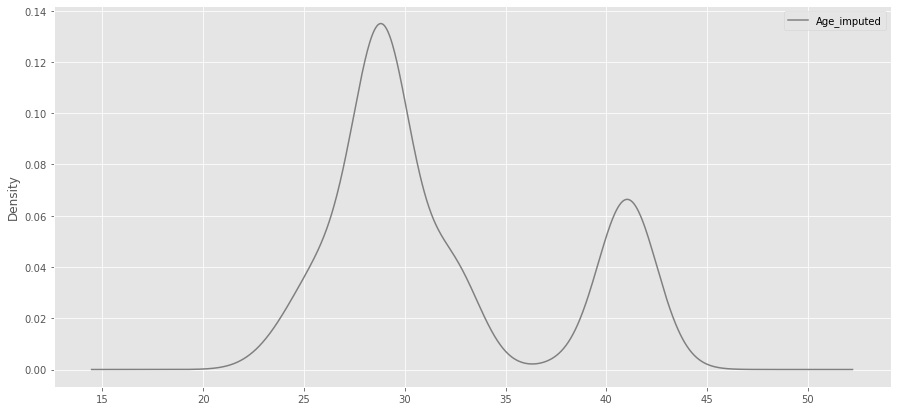

In [12]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df.Age_imputed.plot(kind='kde', ax=ax, color='grey')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Text(30, 0.03, 'The best Age missing values encoding appeared to by Age imputed by Pclass')

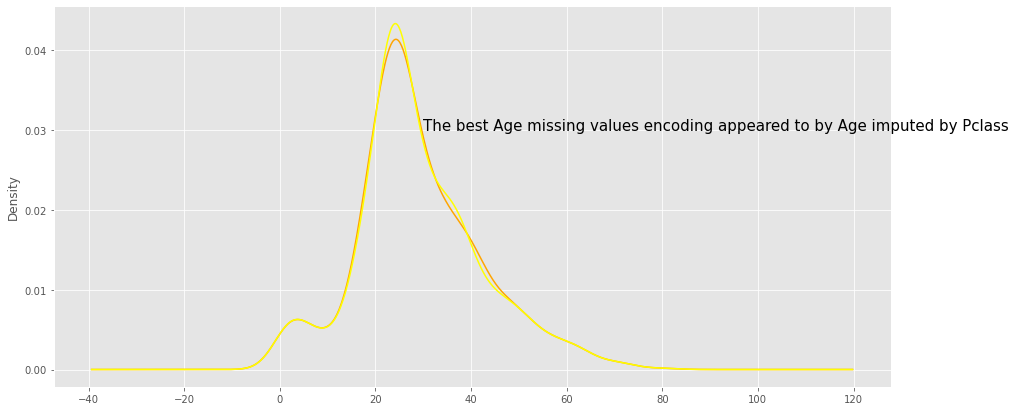

In [13]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111)
df['Age_Sex_Pclass'].plot(kind='kde', ax=ax, color='orange')
df.Age_Pclass.plot(kind='kde', ax=ax, color='yellow')

ax.text(30, 0.03, r'The best Age missing values encoding appeared to by Age imputed by Pclass', fontsize=15)

Conclusion:
The good plan to sucessful handle missing values would comprise the following steps:

1. Encode the numeric missing values applying the abovementioned methods.
2. Plot all graphs.
3. Opt for the one that has the most similar distribution with the original distribution of a variable.


# Irregular Data (Outliers)
1. Remove outliers from the analysis. Having outliers can mess up your analysis by bringing the averages up or down and in general distorting your statistics. Remove them by removing the upper and lower X-percentile of your data.
2. Segment data so outliers are in a separate group. Put all the “normal-looking” data in one group, and outliers in another.This is especially useful for analysis of interest. You might find out that your highest paying customers, who actually buy 3 times above average, are an interesting target for marketing and sales.‍
3. Keep outliers, but use different statistical methods for analysis. Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outliers, without suffering the negative consequences of outliers
4. The influence of Outliers on Machine Learning approaches:
impact  - yes
no impact - no

a) Naivye Bayes Classifier: no

b) SVM: no

c) Linear Regression: yes

d) Logistic Regression: yes

e) Decision Tree Regressor or Classifier---- Not Sensitive

f) Ensemble(RF,XGboost,GB): no

g) KNN: no

h) Kmeans: yes

i) Hierarichal: yes

k) PCA: yes

l) Neural Networks: yes

In [38]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(r"C:\Users\valer\OneDrive\Desktop\Python\train.csv", usecols = ['Age'])
df.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


Text(0, 0.5, 'No of passenger')

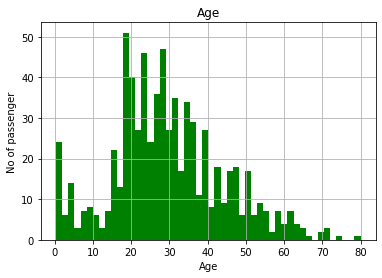

In [39]:
figure=df.Age.hist(bins=50, color = 'green')
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

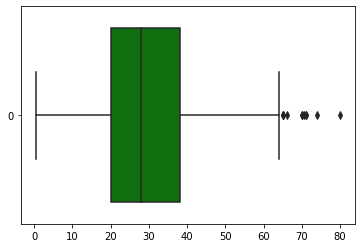

In [40]:
sns.boxplot(data = df["Age"], orient='h', color = 'g')

In [41]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [42]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR

lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print("Lower bridge:")
print(lower_bridge)
print("Upper bridge:")
print(upper_bridge)

Lower bridge:
-33.5
Upper bridge:
91.625


1. Remove outliers from the analysis. Having outliers can mess up your analysis by bringing the averages up or down and in general distorting your statistics. Remove them by removing the upper and lower X-percentile of your data.

In [43]:
df.shape

(891, 1)

In [44]:
df_droppping_lower = df[df['Age'] > lower_bridge]
df_dropping_upper = df_droppping_lower[df_droppping_lower['Age'] < upper_bridge]

In [45]:
df_dropping_upper.shape

(714, 1)

2. Segment data so outliers are in a separate group. Put all the “normal-looking” data in one group, and outliers in another.This is especially useful for analysis of interest. You might find out that your highest paying customers, who actually buy 3 times above average, are an interesting target for marketing and sales.‍

In [46]:
df_ext_73 = df[df['Age']>73]
df_ext_73

,Age
630,80.0
851,74.0


In [47]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [48]:
df['Outliers_Age'] = df[df['Age']>73]
df['Outliers_Age'].isna().sum()

889

In [49]:
df['Outliers_Age'].notnull().sum()

2


3. Keep outliers, but use different statistical methods for analysis. Weighted means (which put more weight on the “normal” part of the distribution) and trimmed means are two common approaches of analyzing datasets with outliers, without suffering the negative consequences of outliers

In [50]:
data=df.copy()
data.loc[data['Age']>=73,'Age']=73
data['Age'].max()

73.0

<IPython.core.display.Javascript object>

Text(0, 0.5, 'No of passenger')

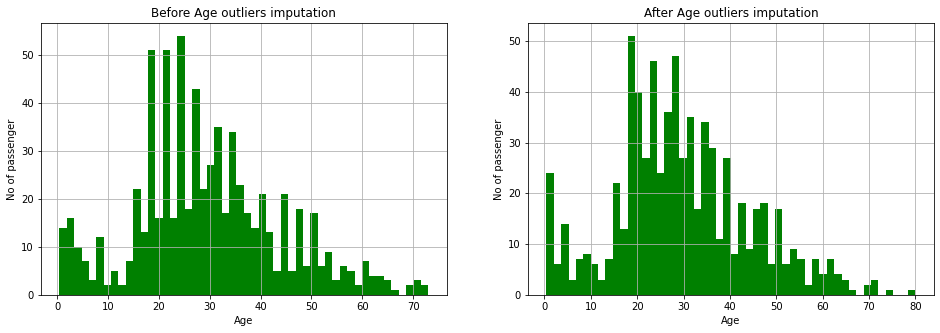

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))


figure=data.Age.hist(bins=50, color = 'g', ax=axes[0])
figure.set_title('Before Age outliers imputation')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')


figure = df.Age.hist(bins=50,color = 'g', ax=axes[1])
figure.set_title('After Age outliers imputation')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')


# Data Transformation

1. Skewed data: Skewness is the distortion of data from normality. It may act as outliers and produce unreliable results. The skewed data must be transformed back to normal distribution. The distribution is highly skewed if the skewness is less than -1 or greater than 1. The distribution is moderately skewed if the skewness is between -1 and -0.5 or between 0.5 and 1 The distribution is approximately symmetric if the skewness is between -0.5 and 0.5. The distribution is symmetric if the skewness is 0.(https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37)

2. Positively skewed data: Log transformation (when the data is highly skewed) log(X) — if no zero values are present, log(C + X) — if zero values are present C is a constant added so that the smallest value will be equal to 1. Square root transformation (when the data is moderately skewed) sqrt(X)(https://www.researchgate.net/post/Log_transformation_of_values_that_include_0_zero_for_statistical_analyses2)

3. Negatively skewed data: Reflect and Log transformation log(K — X) — K is a constant from which the values are subtracted so that the smallest value is 1. (K — X) makes the large number small and the small number large so the negatively skewed data becomes positively skewed. Reflect and Square root transformation sqrt(K — X)(https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution)

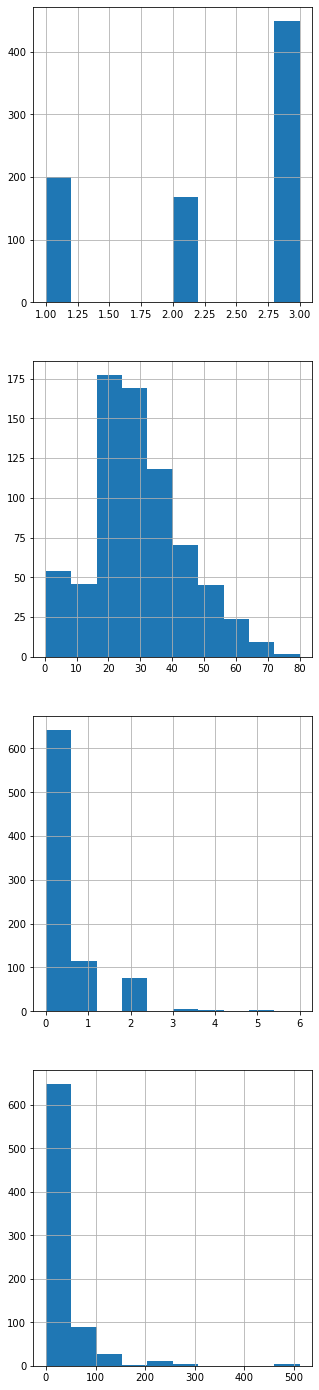

In [52]:
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv')
fig, axs = plt.subplots(len(df.select_dtypes(['float','int']).columns), figsize=(5, 25))
for n, col in enumerate(df.select_dtypes(['float','int']).columns):
    df[col].hist(ax=axs[n])


In [ ]:
def find_skewness(df, numeric_cols):
    """
    Calculate the skewness of the columns and segregate the positive
    and negative skewed data.
    """
    skew_dict = {}
    for col in numeric_cols:
        skew_dict[col] = df[col].skew()
    skew_dict = dict(sorted(skew_dict.items(),key=itemgetter(1)))
    positive_skew_dict = {k:v for (k,v) in skew_dict.items() if v>0}
    negative_skew_dict = {k:v for (k,v) in skew_dict.items() if v<0}
    return skew_dict, positive_skew_dict, negative_skew_dict

In [58]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns

<IPython.core.display.Javascript object>

In [59]:
find_skewness(df, numeric_cols)

({'Pclass': -0.6222516143059803,
  'PassengerId': 0.0,
  'Age': 0.38910778230082704,
  'Survived': 0.4785234382949897,
  'Parch': 2.7167170415642543,
  'SibSp': 3.6953517271630565,
  'Fare': 5.0174166915349145},
 {'Age': 0.38910778230082704,
  'Survived': 0.4785234382949897,
  'Parch': 2.7167170415642543,
  'SibSp': 3.6953517271630565,
  'Fare': 5.0174166915349145},
 {'Pclass': -0.6222516143059803})

In [60]:
def add_constant(data, highly_pos_skewed):
    """
    Look for zeros in the columns. If zeros are present then the log(0) would result in -infinity.
    So before transforming it we need to add it with some constant.
    """
    C = 1
    for col in highly_pos_skewed.keys():
        if(len(df[df[col] == 0]) > 0):
            data[col] = data[col] + C
    return data

In [68]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns


from operator import itemgetter
# the following code is obtained from this notebook: 
# https://www.kaggle.com/srivignesh/data-preprocessing-for-house-price-prediction
# please add a credit to that amazing notebook

def find_skewness(df, numeric_cols):
    """
    Calculate the skewness of the columns and segregate the positive
    and negative skewed data.
    """
    skew_dict = {}
    for col in numeric_cols:
        skew_dict[col] = df[col].skew()
    skew_dict = dict(sorted(skew_dict.items(),key=itemgetter(1)))
    positive_skew_dict = {k:v for (k,v) in skew_dict.items() if v>0}
    negative_skew_dict = {k:v for (k,v) in skew_dict.items() if v<0}
    return skew_dict, positive_skew_dict, negative_skew_dict


def add_constant(data, highly_pos_skewed):
    """
    Look for zeros in the columns. If zeros are present then the log(0) would result in -infinity.
    So before transforming it we need to add it with some constant.
    """
    C = 1
    for col in highly_pos_skewed.keys():
        if(len(df[df[col] == 0]) > 0):
            data[col] = data[col] + C
    return data


def log_transform(data, highly_pos_skewed):
    """
    Log transformation of highly positively skewed columns.
    """
    for col in highly_pos_skewed.keys():
        if(col != 'SalePrice'):
            data[col] = np.log10(data[col])
    return data


def sqrt_transform(data, moderately_pos_skewed):
    """
    Square root transformation of moderately skewed columns.
    """
    for col in moderately_pos_skewed.keys():
        if(col != 'SalePrice'):
            data[col] = np.sqrt(data[col])
    return data


def reflect_sqrt_transform(data, moderately_neg_skewed):
    """
    Reflection and log transformation of highly negatively skewed 
    columns.
    """
    for col in moderately_neg_skewed.keys():
        if(col != 'SalePrice'):
            K = max(data[col]) + 1
            data[col] = np.sqrt(K - data[col])
    return data


<IPython.core.display.Javascript object>

In [65]:
"""
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
"""
skew_dict, positive_skew_dict, negative_skew_dict = find_skewness(df, numeric_cols)
moderately_pos_skewed = {k:v for (k,v) in positive_skew_dict.items() if v>0.5 and v<=1}
highly_pos_skewed = {k:v for (k,v) in positive_skew_dict.items() if v>1}
moderately_neg_skewed = {k:v for (k,v) in negative_skew_dict.items() if v>-1 and v<=0.5}
highly_neg_skewed = {k:v for (k,v) in negative_skew_dict.items() if v<-1}
'''Transform train data.'''
df1 = add_constant(df, highly_pos_skewed)
df1 = log_transform(df, highly_pos_skewed)
df1 = sqrt_transform(df, moderately_pos_skewed)
df1 = reflect_sqrt_transform(df, moderately_neg_skewed )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

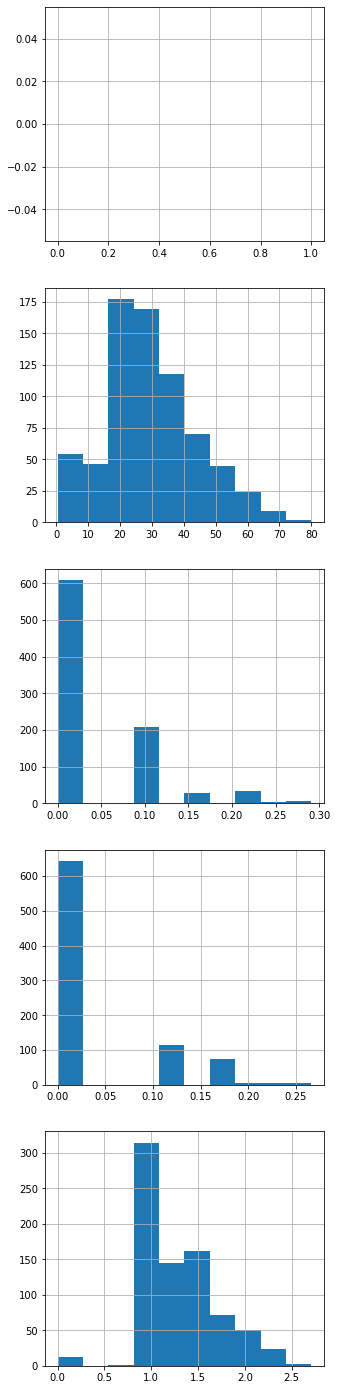

In [66]:
fig, axs = plt.subplots(len(df.select_dtypes(['float','int']).columns), figsize=(5, 25))
for n, col in enumerate(df.select_dtypes(['float','int']).columns):
    df[col].hist(ax=axs[n])

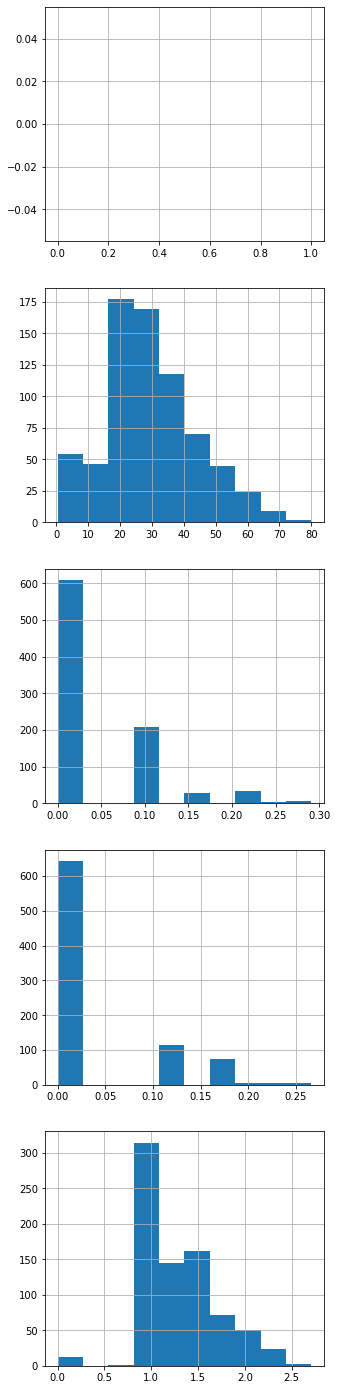

In [67]:
fig, axs = plt.subplots(len(df1.select_dtypes(['float','int']).columns), figsize=(5, 25))
for n, col in enumerate(df1.select_dtypes(['float','int']).columns):
    df1[col].hist(ax=axs[n])

# Scaling

For the scaling purposes I would like to point out three the most popular scaling alrogithms:
1. Standard Scaler
2. Min-Max Scaler
3. Robust Scaler

1. Standard sclaer assumes that your initial data has normal distribution, so it will scale the data in a way to center it around 0 with standard deviation of 1. If you suspect that data is not normally distributed, do not use this scaler

2. Min-Max Scaler shirnks the data from 0 to 1 (-1 to 1 for negative values). It is handling better non-gaussian distribution in contrast to the Standard Scaler, however Min-Max Scler is sensitive to outliers, thus it is probably better to use the Robust Scaler. 

3. Robust Scaler uses the interqurtile range, thus it is less sensitive to outliers than Min-Max, which uses minimum and maximum values of each featue to scale

Standard Scaler

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [28]:
df1 = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv')
df = pd.read_csv(r'C:\Users\valer\OneDrive\Desktop\Python\titanic_train.csv')

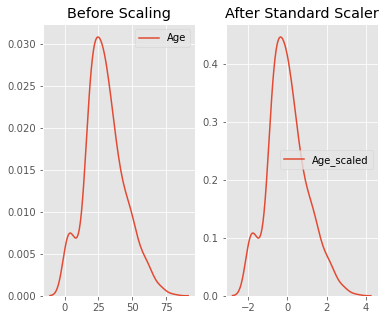

In [42]:
np.random.seed(1)
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df1['Age'].values.reshape(-1, 1))
scaled_df = pd.DataFrame(scaled_df, columns=['Age_scaled_stand'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df1['Age'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['Age_scaled_stand'], ax=ax2)
plt.show()

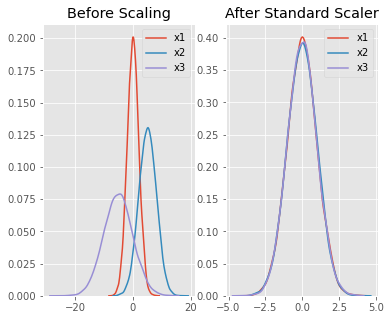

In [36]:
np.random.seed(1)
df_example = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_example)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_example['x1'], ax=ax1)
sns.kdeplot(df_example['x2'], ax=ax1)
sns.kdeplot(df_example['x3'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Min-Max Scaler

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,NaN,"Braund, Mr. Owen Harris",NaN,22.0,1,0.0,A/5 21171,7.2500,NaN,S
1,2,1,NaN,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0.0,PC 17599,71.2833,C85,C
2,3,1,NaN,"Heikkinen, Miss. Laina",NaN,26.0,0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,NaN,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,NaN,113803,53.1000,C123,S
4,5,0,NaN,"Allen, Mr. William Henry",NaN,35.0,0,NaN,373450,8.0500,NaN,S


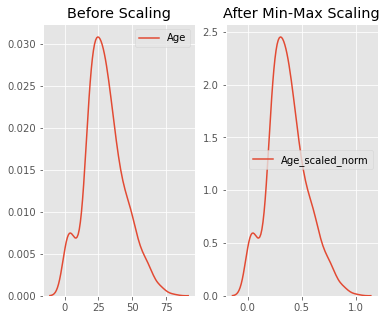

In [43]:

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df1['Age'].values.reshape(-1, 1))
scaled_df = pd.DataFrame(scaled_df, columns=['Age_scaled_norm'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df1['Age'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['Age_scaled_norm'], ax=ax2)

plt.show()

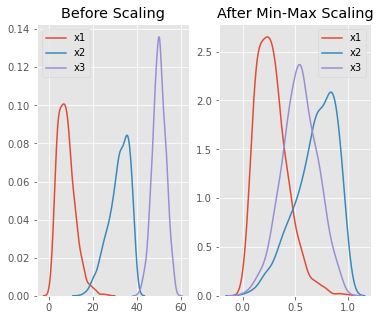

In [35]:
df_example2 = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df_example2)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_example2['x1'], ax=ax1)
sns.kdeplot(df_example2['x2'], ax=ax1)
sns.kdeplot(df_example2['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

Robust Scaler

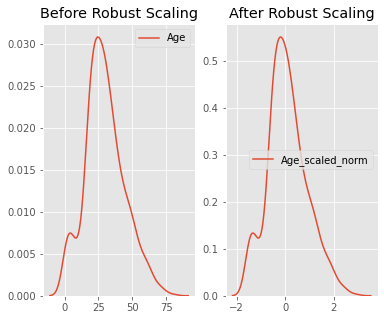

In [45]:

scaler = preprocessing.RobustScaler()
scaled_df = scaler.fit_transform(df1['Age'].values.reshape(-1, 1))
scaled_df = pd.DataFrame(scaled_df, columns=['Age_scaled_norm'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Robust Scaling')
sns.kdeplot(df1['Age'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(scaled_df['Age_scaled_norm'], ax=ax2)

plt.show()

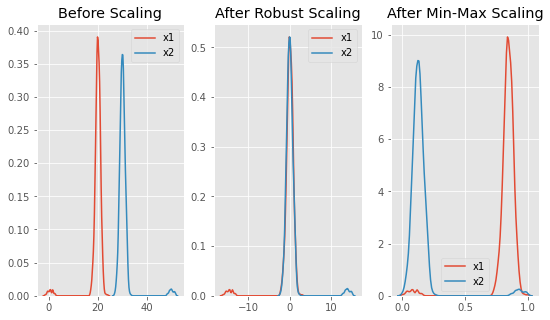

In [44]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])
scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()